In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1

In [5]:
q1_df = pd.read_csv('data/Q1TrainData.csv')
q1_df.head(20)

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp
0,2018-07-14,0.584864,Albacore,Indian ocean,4-5,1888.276084,2.066711,66.166377
1,2019-08-28,0.225613,Albacore,Pacific ocean,3-4,2209.729676,1.890274,61.966487
2,2018-12-02,0.428228,Albacore,Pacific ocean,>6,2139.592815,1.869006,64.455046
3,2019-12-29,0.564230,Yellowfin,Indian ocean,1-3,1994.035137,3.002083,66.917412
4,2019-03-24,0.570164,Albacore,Indian ocean,3-4,1843.128772,1.814764,66.077501
5,2018-07-04,0.302579,Albacore,Atlantic ocean,>6,2226.451277,2.180335,64.429268
6,2018-08-10,0.623449,Yellowfin,Indian ocean,4-5,2003.292999,2.839068,67.221478
7,2018-08-11,1.012282,Yellowfin,Pacific ocean,<1,2106.558415,2.355736,70.168799
8,2018-02-12,0.223906,Yellowfin,Atlantic ocean,4-5,2326.727294,3.142960,67.650686
9,2019-09-05,0.493205,Albacore,Atlantic ocean,>6,2253.419159,1.872668,62.512794


## EDA

In [6]:
len(q1_df)

1500

In [16]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   yield           1500 non-null   float64
 2   species         1500 non-null   object 
 3   region          1500 non-null   object 
 4   size_range      1500 non-null   object 
 5   dump_size       1500 non-null   float64
 6   cooking_time    1500 non-null   float64
 7   post_cook_temp  1500 non-null   float64
dtypes: float64(4), object(4)
memory usage: 93.9+ KB


/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


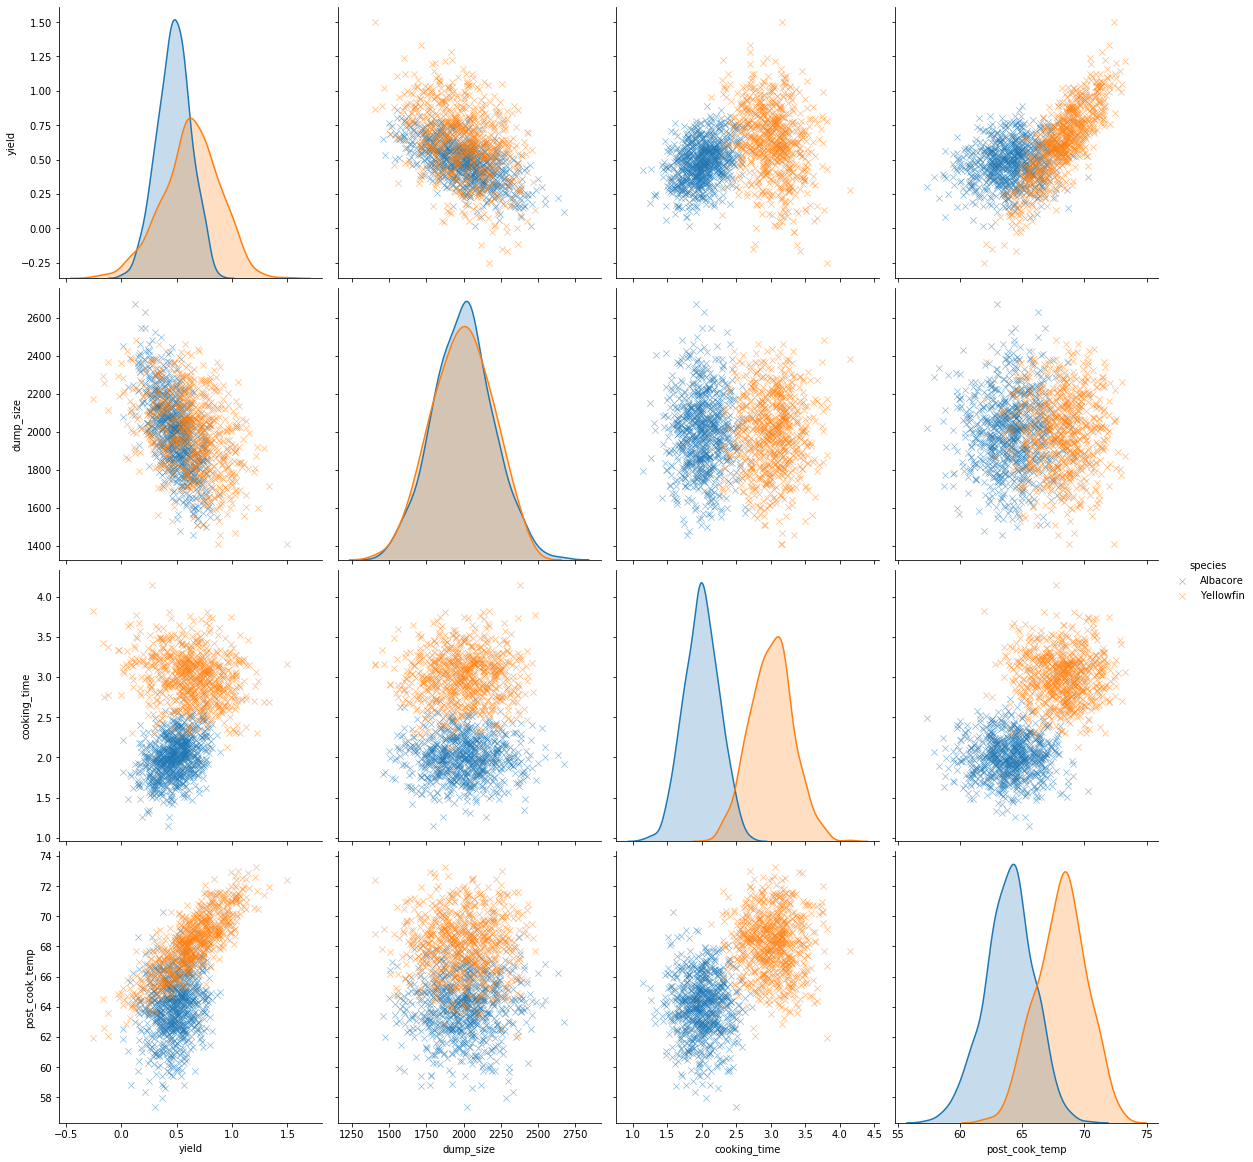

In [41]:
sns.pairplot(q1_df, 
             hue='species', 
             plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor':'k','marker':'x'},
             size = 4)

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


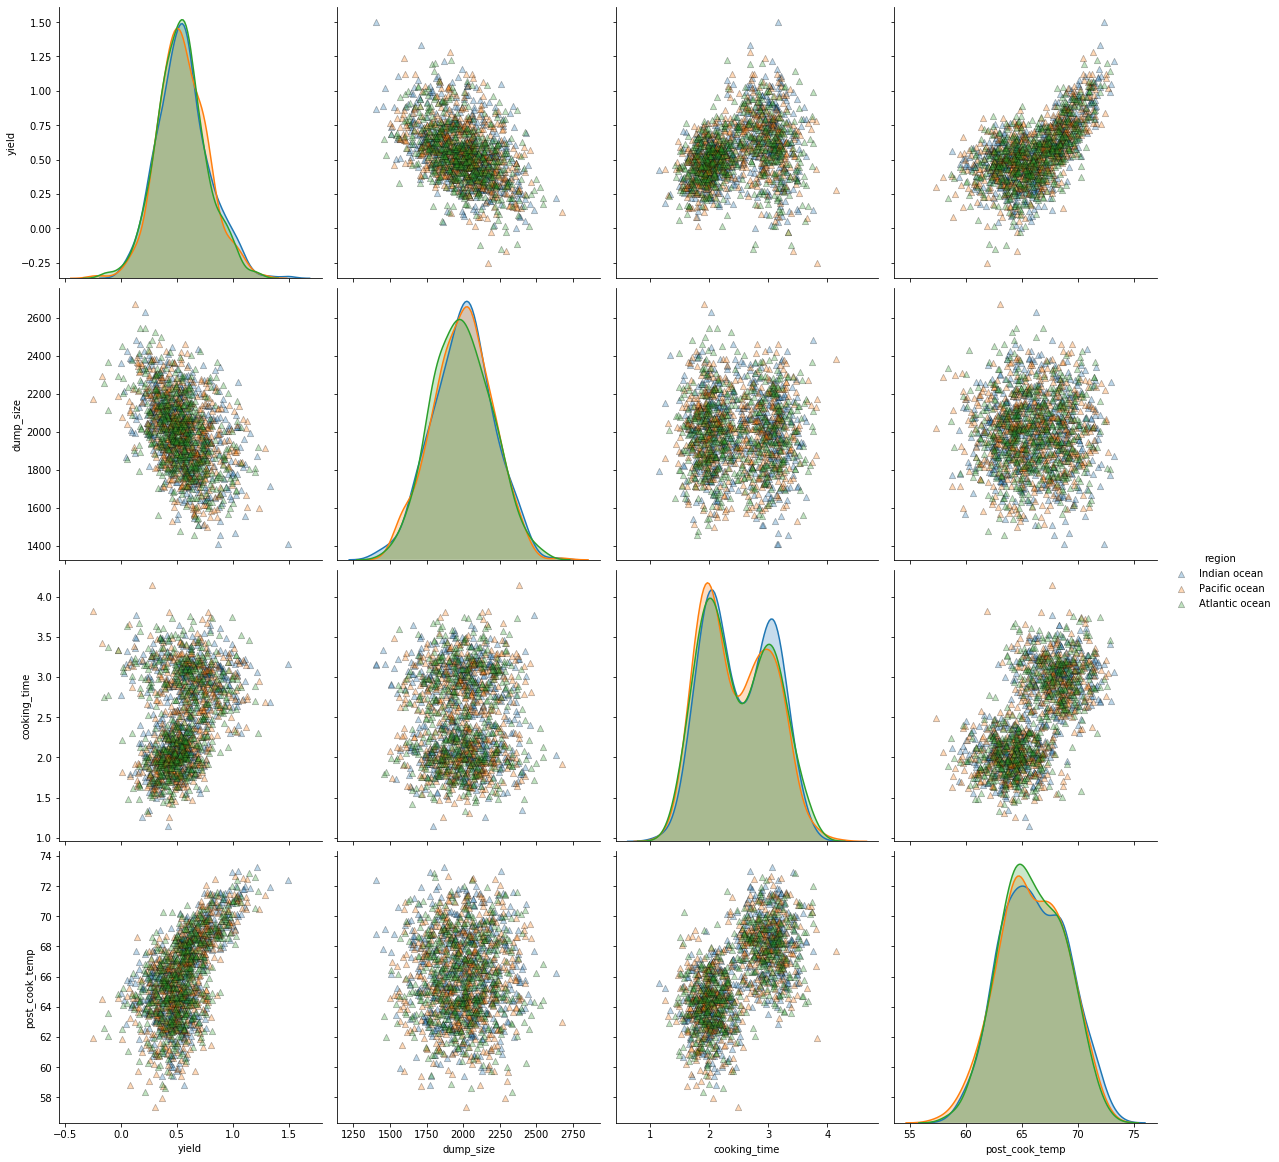

In [46]:
sns.pairplot(q1_df, 
             hue='region',
             plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor':'k', 'marker':'^'},
             size = 4)

In [49]:
print('Non-zero missing rate(%)')
for col in q1_df.columns:
    print('{}:\t{}%'.format(col, sum(q1_df[col].isnull())*100/len(q1_df)))

Non-zero missing rate(%)
date:	0.0%
yield:	0.0%
species:	0.0%
region:	0.0%
size_range:	0.0%
dump_size:	0.0%
cooking_time:	0.0%
post_cook_temp:	0.0%


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [52]:
q1_df_train = pd.get_dummies(q1_df, columns=['species','region','size_range'])
q1_df_train.head(10)

,date,yield,dump_size,cooking_time,post_cook_temp,species_Albacore,species_Yellowfin,region_Atlantic ocean,region_Indian ocean,region_Pacific ocean,size_range_1-3,size_range_3-4,size_range_4-5,size_range_5-6,size_range_<1,size_range_>6
0,2018-07-14,0.584864,1888.276084,2.066711,66.166377,1,0,0,1,0,0,0,1,0,0,0
1,2019-08-28,0.225613,2209.729676,1.890274,61.966487,1,0,0,0,1,0,1,0,0,0,0
2,2018-12-02,0.428228,2139.592815,1.869006,64.455046,1,0,0,0,1,0,0,0,0,0,1
3,2019-12-29,0.564230,1994.035137,3.002083,66.917412,0,1,0,1,0,1,0,0,0,0,0
4,2019-03-24,0.570164,1843.128772,1.814764,66.077501,1,0,0,1,0,0,1,0,0,0,0
5,2018-07-04,0.302579,2226.451277,2.180335,64.429268,1,0,1,0,0,0,0,0,0,0,1
6,2018-08-10,0.623449,2003.292999,2.839068,67.221478,0,1,0,1,0,0,0,1,0,0,0
7,2018-08-11,1.012282,2106.558415,2.355736,70.168799,0,1,0,0,1,0,0,0,0,1,0
8,2018-02-12,0.223906,2326.727294,3.142960,67.650686,0,1,1,0,0,0,0,1,0,0,0
9,2019-09-05,0.493205,2253.419159,1.872668,62.512794,1,0,1,0,0,0,0,0,0,0,1


In [53]:
y = q1_df_train['yield']
X = q1_df_train.drop(['date','yield'], axis=1).to_numpy()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
linReg.score(X_test, y_test)

0.5481497501807551

In [65]:
ranFor = RandomForestRegressor()
ranFor.fit(X_train, y_train)
ranFor.score(X_test, y_test)

0.7113110056857547

In [66]:
gradBoo = GradientBoostingRegressor()
gradBoo.fit(X_train, y_train)
gradBoo.score(X_test, y_test)

0.7430278651530771